## Introduction to Python, Session 3 

In our last section, we started to work with loops and some of the operations that comes with loops. In this session, we will extend our conversation and look at some more applied applications using some real world data. 

We will be using the mall customer dataset in our examples. This dataset is obtainable through kaggle,however we will be reading the csv directly in from a github location where the data is hosted. https://www.kaggle.com/shwetabh123/mall-customers

We will be using Pandas to read in the data. We will be doing a more in depth lesson on Pandas since knowledge of library is mandatory for any analytical workflow in python. 

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt 

import seaborn as sns

In [16]:
url = 'https://raw.githubusercontent.com/DACUS1995/BIRCH-Mall-Customers-clustering/master/Mall_Customers.csv'

df = pd.read_csv(url,parse_dates=[0])

df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


When exposed to any new dataset, a best practice is to view the first few rows of the data and understand what each row and column means. We can use the head function with the parameter 5 to inspect the first 5 rows of our dataset. Right off the bat, I notice there is a column called "CustomerId." By defition, we know that this column is our primary key. Since it is a primary key, we know that each value in customer ID must be unique and non empty. This means each row pertains to a different customer, hence the other columns must be features associated with each customer. We are given customer features Gender, Age, Annual Income, and Spending Score. 

Our next step should be to identify the type of variable we are given. This will drive the analysis we can do on this dataset. Gender is a categorical variable with at most two entries. Age, Income, and Spending Score are numerical. We can learn more about the data by using the describe function. This will produce descriptive statistics for the numerical variables in this dataset. 

The info function will give us information on the data types for each variable in addition to metadata on the data structure. We can see that our data has 200 rows with 4 columns. 

In [3]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


Now that we have an idea of what the data actually is, we need to understand some important mathematical assumptions regarding k means. Understanding the assumptions/requirements of a particular algorithm is mandatory. This understanding is the difference between garbage in and garbage out. All algorithms have assumptions where some are more strict than others.

* clustering methods that require using medians or means are unstable when it comes to categorical data. Categorical data is essentially non numeric data such as the Gender variable in our sample data. How would you would take the average between male and female? We could dummy code variables but the more dummy variables you create, clusters become less meanginful especially if you are not able to have at least 50 rows of data per variable. 50 rows of data per variable is an academic rule of thumb. (I'll show what that looks like below) With a variable such as Gender, we could get away with dummy coding since Gender will only create two dummy variables. 

* We also want to check if our data contains a variable that could be related to a label vector. If we already have a variable that groups our data into intuitive clusters, then it is more likely that our algorithm will underperform. This automatically creates a bias within the algorithm and any results will more than likely be garbage out. 

* We need to check what our data looks like on a simple scatter plot. clustering algorithms such as k means depends on the data being spherical. This assumption checks if our data could be seperated into clusters that make sense. If our data is not spherical, then we may get another case of garbage out. Some workarounds to non-spherical data is converting data points into polar coordinates. For those who have not taken calculus 2, polar coordinates are a 2 dimensional coordinate system where each point on the plane is determined by the distance and angle from a reference point. 

* One other assumption for k means is that the cluster sizes should be similar. This allows for the algorithm to be able to define boundaries between clusters with less complications. 

One note about k means is that k means falls under the hard clustering umbrella. This means that all data points exist in one cluster mutually exclusive from other clusters. In the long term, our goal is figure out a way to cluster data points that can potentially exist in one or more cluster. 

## Data Processing 

Data processing is mandatory before any sort of analysis. Data processing entails dealing with missing values, normalizing values, dealing with outliers, applying transformations on data, and feature engineering/importance. For our example, our mall customer data is reasonably clean so the only bit of processing we need to do is transform gender to dummy variables. 

You don't have to know this now but we will be using the one hot encoder package. This package will take a categorical value and convert it into n columns where n represents the number of unique values in said variable. If the row contains that entry, then it is represented with a 1 otherwise 0.

This package will automatically check if a variable is categorical or not. If it is not, it will be skipped. As you can see, Gender is now broken up into two dummy variables and each customer will have a 1 or 0 but not both. For the sake of this example, we will NOT consider age or gender in the clustering simply because we want to be able to show a 2 dimensional visual cluster. We need to consider more advanced visualization techniques if we want to consider age and gender in our visual clusters. As a matter of fact, students are exposed to multivariate visualizations in calculus 3. 



In [21]:
import category_encoders as ce 

ohe= ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)

df=df.drop(['CustomerID'], axis=1)

df2=ohe.fit_transform(df)

df2.head()

,Gender_Male,Gender_Female,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,1,0,21,15,81
2,0,1,20,16,6
3,0,1,23,16,77
4,0,1,31,17,40


We now have data that is clean and numeric. Before we perform any sort of analysis, we should do some exploration on our data set to better understand and anticipate if there are underlying patterns or relationships in the data. 

## Exploring the Data 

You don't have to worry about knowing how to visualize at this point but for the sake of seeing a typical data science workflow, its good to include in this session. I am going to partition ages into groups and get a sense of the number of customers that fall within each group. It is important to make the distinction that I will NOT be transforming age into bins. For analysis, age will remain as singular age values instead of bins. When you bin continous variables, you artificially create noise. Most if not all data science experts will frown upon binning continous variables. Binning for the sake of data exploration is okay. 

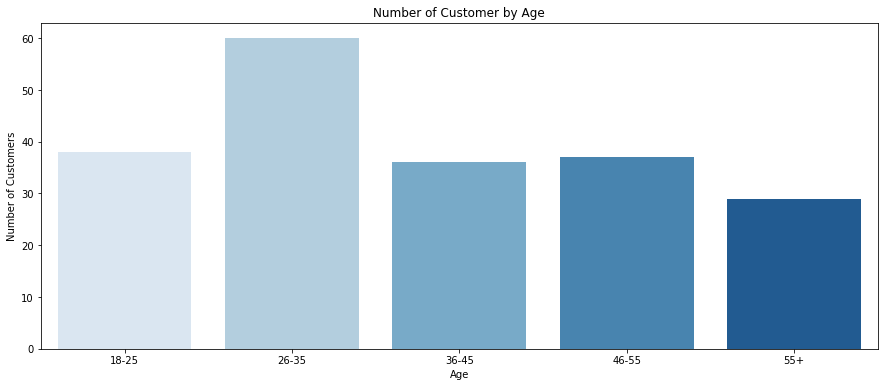

In [5]:
#Define age groups and put them all into sub data sets based on defined condition 
age18_25 = df2.Age[(df2.Age <= 25) & (df2.Age >= 18)] #ages 18 to 25 

age26_35 = df2.Age[(df2.Age <= 35) & (df2.Age >= 26)] #ages 26 to 36

age36_45 = df2.Age[(df2.Age <= 45) & (df2.Age >= 36)] #ages 36 to 45 

age46_55 = df2.Age[(df2.Age <= 55) & (df2.Age >= 46)] #ages 46 to 55 

age55above = df2.Age[df2.Age >= 56] # 56 and older 

x = ["18-25","26-35","36-45","46-55","55+"] #create nice labels for each age group that are easy to understand 

#initialize the length of the y coordinate by using the len function for each age group (count number of customers per group)
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

#use a plotting package to put the bars on a single 15X6 plot on screen 
plt.figure(figsize=(15,6))

sns.barplot(x=x, y=y, palette="Blues") #color pallete 

plt.title("Number of Customer by Age") #graph title 

plt.xlabel("Age") #x axis label 

plt.ylabel("Number of Customers") #y axis label 

plt.show() #show plot

What do we see? We observe that the majority of mall customers fall within the 26-35 age group. This type of insight can be very telling for retail purposes. I am going to repeat this same exact process for score and income. This will give me a better sense on what type of people come to the mall. Lets start with score. We know score represents the number of transactions per customer on a 0-100 scale. 

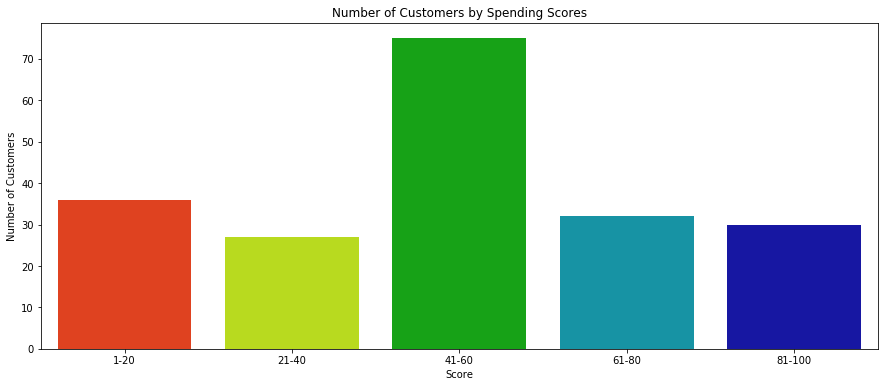

In [10]:
ss1_20 = df2["Spending Score (1-100)"][(df2["Spending Score (1-100)"] >= 1) & (df2["Spending Score (1-100)"] <= 20)]

ss21_40 = df2["Spending Score (1-100)"][(df2["Spending Score (1-100)"] >= 21) & (df2["Spending Score (1-100)"] <= 40)]

ss41_60 = df2["Spending Score (1-100)"][(df2["Spending Score (1-100)"] >= 41) & (df2["Spending Score (1-100)"] <= 60)]

ss61_80 = df2["Spending Score (1-100)"][(df2["Spending Score (1-100)"] >= 61) & (df2["Spending Score (1-100)"] <= 80)]

ss81_100 = df2["Spending Score (1-100)"][(df2["Spending Score (1-100)"] >= 81) & (df2["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]

ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))

sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")

plt.title("Number of Customers by Spending Scores")

plt.xlabel("Score")

plt.ylabel("Number of Customers")

plt.show()

It looks like the majority of customers fall within a middle range spending score. Perhaps people go to the mall for other reasons than shopping? Lets perform a similar inspection for income. 

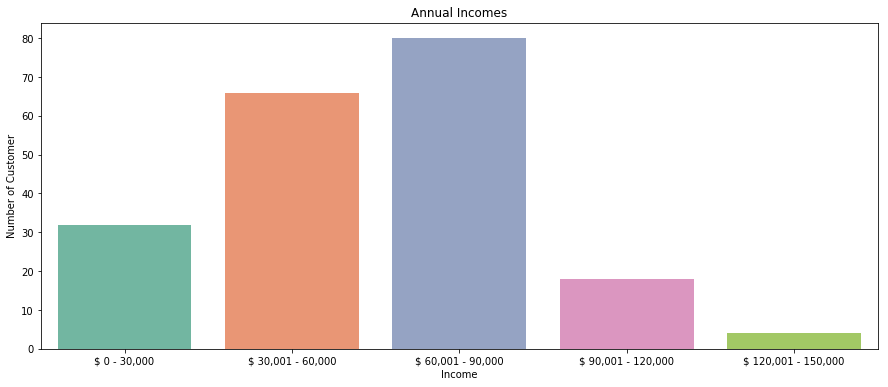

In [8]:
ai0_30 = df2["Annual Income (k$)"][(df2["Annual Income (k$)"] >= 0) & (df2["Annual Income (k$)"] <= 30)]

ai31_60 = df2["Annual Income (k$)"][(df2["Annual Income (k$)"] >= 31) & (df2["Annual Income (k$)"] <= 60)]

ai61_90 = df2["Annual Income (k$)"][(df2["Annual Income (k$)"] >= 61) & (df2["Annual Income (k$)"] <= 90)]

ai91_120 = df2["Annual Income (k$)"][(df2["Annual Income (k$)"] >= 91) & (df2["Annual Income (k$)"] <= 120)]

ai121_150 = df2["Annual Income (k$)"][(df2["Annual Income (k$)"] >= 121) & (df2["Annual Income (k$)"] <= 150)]


aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]

aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))

sns.barplot(x=aix, y=aiy, palette="Set2")

plt.title("Number of Customers by Annual Income")

plt.xlabel("Income")

plt.ylabel("Number of Customers")

plt.show()

It looks like most customers fall within the 60-90k annual income bracket followed closely by 30k - 60k. Through this data inspection, perhaps some intutition is starting to form regarding how to group these mall customers. We are missing one more variable. Lets check how many customers are male and female. We will use the original dataset before one hot encoding to get frequency counts. 

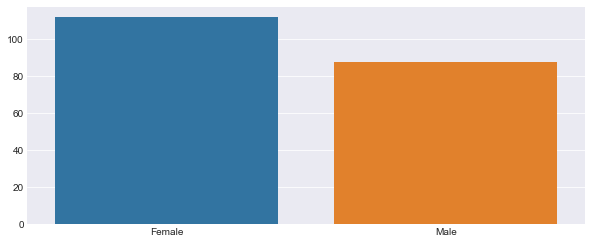

In [9]:
genders = df.Gender.value_counts()

sns.set_style("darkgrid")

plt.figure(figsize=(10,4))

sns.barplot(x=genders.index, y=genders.values)

plt.show()

We can see that the majority of mall visitors are female but there does not seem to be a huge difference between males and females in terms of number of customers to the mall. 

## K-Means Clustering 

We will first try to perform k means clustering on our dataset without using any python packages. We will then use the native scikit learn package to see if it matches up with our hand calculations. Lets review the steps required for k-means. 

* Step 1: Pick k cluster centroids at random. Lets assume our collection of centroids takes the form $c_{1}, c_{2},c_{3},...,c_{k}$ 


* Step 2: Each of our $C_{i}$ centroids define each cluster. We iterate through each datapoint and assign it to the nearest centroid based on the Squared Euclidean Distance. $\underset { { c }_{ i }\epsilon C }{ argmin(dist({ c }_{ i },x))^{2} }$ Don't worry about the notation. It is simply stating that we compute the squared euclidean distance between data points and centroid and take the minimum distance as our criteria to assign data points to clusters. 


* Step 3: We re-calculate the centroids at this point by taking the average of the data points that have been assigned to a cluster in step 2 based on that cluster's centroid. The mean is calculated as follows ${ c }_{ i }=\frac { 1 }{ { S }_{ i } } \sum _{ { x }_{ i } \epsilon { S }_{ i } }^{  }{ { x }_{ i } }$ If the notation does not make sense, this equation is simply stating that for all points S within each cluster, compute the average distance across all points S. 


* Step 4: We repeat steps 1 and 2 until we reach convergence. Convergence means that we finally reach non changing centroids. This implies that distance metrics are minimized or we directed our algorithm to perform a specific number of iterations. One thing to note is that convergence does not imply "correct" solutions. This is dependent on the number of clusters picked at step 1. We may needs to repeat using trial and error. 

There are som important facts to understand about this algorithm. We already examined some of th requirements but we should also know that the algorithm will be highly unstable as dimension increases. In other words, the more columns your data has, the less efficient this algorithm will be. In this case you should consider some advanced dimension reduction methods. We also mentioned that the data has to be numerical. Even if we want to dummy code categorical values, we should try to avoid this practice with variables that have many categorical values. If we want to apply clustering to categorical or mixed data, we should consider k-mode. We will cover k-mode in a future session. 

To begin, we are going to pick a number for k, store values regarding the dimensions of the data, and make a copy of the data in case we change something in the data. 

In [90]:
#make a data copy 
X=df2.iloc[:, [3,4]].values

#number of iterations
n_iterations=10

# Number of clusters
K = 5

# Number of training data
m = X.shape[0]

# Number of features in the data
n = X.shape[1]

Our Next step is to initialize the centroids at random. 

In [92]:
Centroids=np.array([]).reshape(n,0)

In [93]:
import random as rd 

for i in range(K):
    
    rand=rd.randint(0,m-1)
    
    Centroids=np.c_[Centroids,X[rand]]

Our next step is to compute the distance metrics from the centroid to each data point and take the minimum distance across distances. Assign each data point to the centroid based on minimum distance. 

We want our result to be a dictionary data type so we create an empty dictionary. As for the calculation, we store the distances in a m by k matrix. We find our minimum using this matrix. 

In [94]:
result={}

In [95]:
EuclidianDistance=np.array([]).reshape(m,0)

for k in range(K):
    
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
C=np.argmin(EuclidianDistance,axis=1)+1

We will then assign points to clusters based on those centroid calculations. The empty dictionary Y, will store our temp cluster assignments for 1 of the 10 iterations. We will perform on iteration and then loop so that we perform it n_iteration times. 

In [83]:
Y={}

for k in range(K):
    
    Y[k+1]=np.array([]).reshape(2,0)
    
for i in range(m):
    
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    
    Y[k+1]=Y[k+1].T
    
for k in range(K):
    
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [96]:
for i in range(n_iterations):
    
#step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    
for k in range(K):
            
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            
    C=np.argmin(EuclidianDistance,axis=1)+1
    
#step 2.b
Y={}

for k in range(K):
    
    Y[k+1]=np.array([]).reshape(2,0)
    
for i in range(m):
            
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
                 
        Y[k+1]=Y[k+1].T
    
for k in range(K):
            
    Centroids[:,k]=np.mean(Y[k+1],axis=0)
            
Output=Y

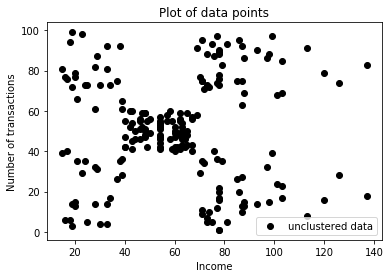

In [98]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')

plt.xlabel('Income')

plt.ylabel('Number of transactions')

plt.legend()

plt.title('Plot of data points')

plt.show()

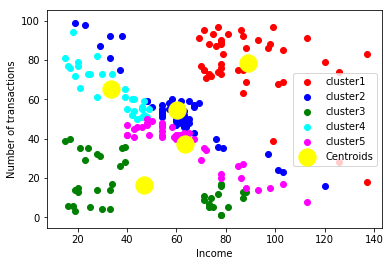

In [99]:
color=['red','blue','green','cyan','magenta']

labels=['cluster1','cluster2','cluster3','cluster4','cluster5']

for k in range(K):
    
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')

plt.xlabel('Income')

plt.ylabel('Number of transactions')

plt.legend()

plt.show()

After 10 iterations, we were able to group our customers into 5 clusters based on their income and transaction score. We don't know if these clusters are good or not. There are methods that take away the trial and error and allow us to find the optimal number of clusters. 

This tutorial was based on the following articles: 

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

https://towardsdatascience.com/mall-customers-segmentation-using-machine-learning-274ddf5575d5

## Homework 

Please start this tutorial using Pandas

https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/